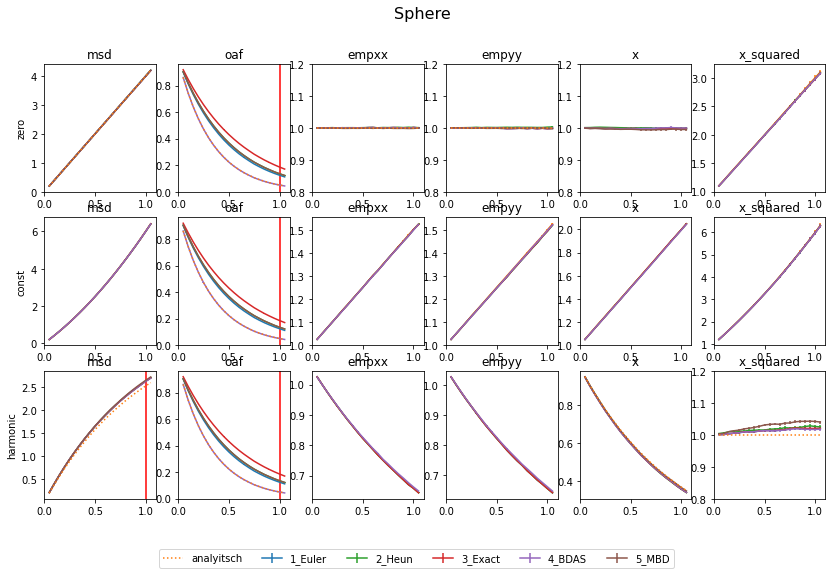

In [9]:
import matplotlib.pyplot as plt
import numpy as np

forces = ["zero","const","harmonic"]
integrators = ["1_Euler", "2_Heun", "3_Exact", "4_BDAS", "5_MBD"]
computes = ["msd", "oaf", "empxx", "empyy", "x", "x_squared"]


analytisch = [[True,True,True,True,True,False],
              [False,True,False,False,False,False],
              [True,True,False,False,True,True]]
kwargs = [[{},{},{},{},{},{}],
              [{},{},{},{},{},{}],
              [{},{},{},{},{},{}]]


path = "../data/out/"
length = "_1.000000"
fig, ax = plt.subplots(3,6,figsize=(14,8))

for forceindex,force in enumerate(forces):
    for compute_index,compute in enumerate(computes):
        for index,integrator in enumerate(integrators):
            file = path+compute+"_"+integrator+"_"+force+length+".dat"
            data = np.loadtxt(file,delimiter=" ")
            ax[forceindex][compute_index].errorbar(data[:,0],data[:,1],yerr=data[:,2],label=integrator,**kwargs[forceindex][compute_index])
            if index==0 and analytisch[forceindex][compute_index]:
                 ax[forceindex][compute_index].plot(data[:,0],data[:,3],":",label="analyitsch", zorder=100)
        ax[forceindex][compute_index].set_title(compute)
        #ax[forceindex][compute_index].legend()
        if forceindex==0 and compute_index==0:
            plt.figlegend( loc = 'lower center', ncol=6, labelspacing=0. )

ax[0][0].set_ylabel("zero")
ax[1][0].set_ylabel("const")
ax[2][0].set_ylabel("harmonic")
ax[0][1].axvline(1,color="r")
ax[1][1].axvline(1,color="r")
ax[2][1].axvline(1,color="r")
ax[2][0].axvline(1,color="r")


ax[0][2].set_ylim([0.8,1.2])
ax[0][3].set_ylim([0.8,1.2])
ax[0][4].set_ylim([0.8,1.2])
ax[2][5].set_ylim([0.8,1.2])
#plt.tight_layout()
fig.suptitle('Sphere', fontsize=16)
plt.savefig("../sphere_2d.pdf")
plt.show()

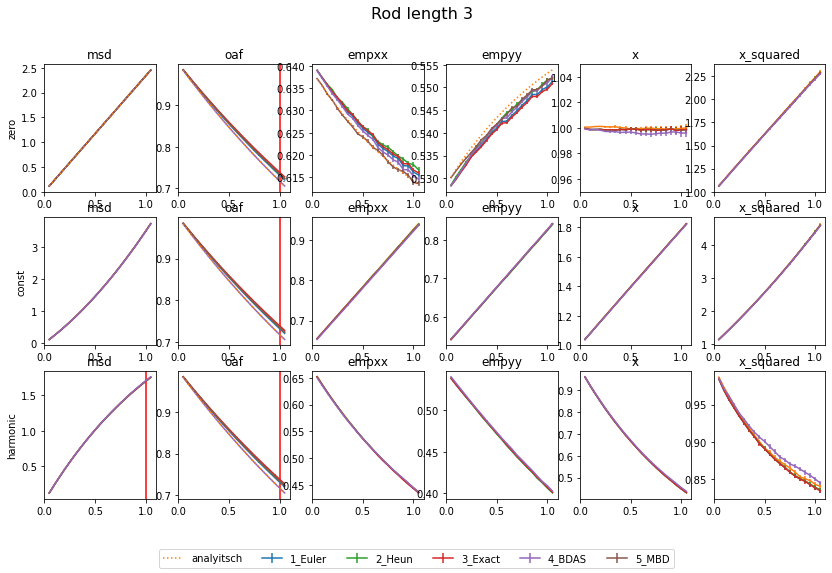

In [10]:
analytisch = [[True,True,True,True,False,False],
              [False,True,False,False,False,False],
              [False,True,False,False,False,False]]
kwargs = [[{},{},{},{},{},{}],
              [{},{},{},{},{},{}],
              [{},{},{},{},{},{}]]


path = "../data/out/"
fig, ax = plt.subplots(3,6,figsize=(14,8))
length = "_3.000000"
for forceindex,force in enumerate(forces):
    for compute_index,compute in enumerate(computes):
        for index,integrator in enumerate(integrators):
            file = path+compute+"_"+integrator+"_"+force+length+".dat"
            data = np.loadtxt(file,delimiter=" ")
            ax[forceindex][compute_index].errorbar(data[:,0],data[:,1],yerr=data[:,2],label=integrator,**kwargs[forceindex][compute_index])
            if index==0 and analytisch[forceindex][compute_index]:
                 ax[forceindex][compute_index].plot(data[:,0],data[:,3],":",label="analyitsch", zorder=100)
        ax[forceindex][compute_index].set_title(compute)
        if forceindex==0 and compute_index==0:
            plt.figlegend( loc = 'lower center', ncol=6, labelspacing=0. )

ax[0][0].set_ylabel("zero")
ax[1][0].set_ylabel("const")
ax[2][0].set_ylabel("harmonic")
ax[0][1].axvline(1,color="r")
ax[1][1].axvline(1,color="r")
ax[2][1].axvline(1,color="r")
ax[2][0].axvline(1,color="r")

fig.suptitle('Rod length 3', fontsize=16)

#ax[0][2].set_ylim([0.8,1.2])
#ax[0][3].set_ylim([0.8,1.2])
ax[0][4].set_ylim([0.95,1.05])
#ax[2][5].set_ylim([0.8,1.2])
#plt.tight_layout()
plt.savefig("../length3_2d.pdf")
plt.show()
